# Task 2: Data Exploration for Amharic NER Labeling

This notebook explores the scraped Telegram data (`data/raw/telegram_data.csv`) to prepare for labeling 50 messages in CoNLL format for Named Entity Recognition (NER). The goals are:
- Load and inspect the data.
- Select 50 diverse messages for labeling.
- Experiment with tokenization (whitespace and XLM-RoBERTa).
- Prototype labeling for entities: `B-Product`, `I-Product`, `B-LOC`, `I-LOC`, `B-PRICE`, `I-PRICE`, `O`.
- Visualize data to inform labeling strategy.

This supports the development of `scripts/data_labeling/label_data.py` and `data/processed/labeled_data.conll`.


## 1. Setup and Imports
Install and import libraries for data handling, tokenization, and visualization.


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
import random

random.seed(42)

data_path = '../data/raw/telegram_data.csv'


## 2. Load and Inspect Data
Load `telegram_data.csv` and check its structure, missing values, and Amharic text.

In [2]:
try:
    df = pd.read_csv(data_path, encoding='utf-8')
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File {data_path} not found.")

# Display basic info
print("\nData Info:")
print(df.info())

# Display first 5 rows
print("\nSample Data:")
print(df.head())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Sample Amharic messages
print("\nSample Messages:")
print(df['Message'].dropna().sample(5).to_list())


Data loaded successfully!

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30134 entries, 0 to 30133
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel Title     30134 non-null  object
 1   Channel Username  30134 non-null  object
 2   ID                30134 non-null  int64 
 3   Message           18525 non-null  object
 4   Date              30134 non-null  object
 5   Views             30134 non-null  int64 
 6   Media Path        25569 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.6+ MB
None

Sample Data:
    Channel Title Channel Username    ID  \
0  Zemen Express®    @ZemenExpress  6982   
1  Zemen Express®    @ZemenExpress  6981   
2  Zemen Express®    @ZemenExpress  6980   
3  Zemen Express®    @ZemenExpress  6979   
4  Zemen Express®    @ZemenExpress  6978   

                                             Message  \
0  💥💥...................................💥💥 📌Imita.

## 3. Select Messages
Randomly select 50 messages from the `Message` column, ensuring diversity.

In [3]:
messages = df['Message'].dropna().sample(n=50, random_state=42).tolist()
print(f"Selected {len(messages)} messages:")
for i, msg in enumerate(messages[:5], 1):
    print(f"{i}. {msg}")

Selected 50 messages:
1. Adidas ZX Size 40,41,42 Price 2900 birr 🏢አድራሻ-ሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ አንደኛ ደረጃ እንደወጡ ያገኙናል or call 0920238243
2. መነሻዬ ስዕል ደብተር ጥቅል ምሉዕነት ከጥራት ጋር !! 👉 በፍፁም ቀለም የማያሳልፍ የስዕል ደብተር 👉 ሁለት ገፆችን በወጥነት መጠቀም የሚያስችል 👉 በየትኛውም እድሜ ክልል ሊጠቀሙበት የሚችሉት 👉 12 መጥፋት የሚችሉ ባለቀለም እርሳሶችን ያካተተ 👉 ለአያያዝ አመቺ የሆኑ 3 እርሳሶች 👉 ሲያጠፉባቸው የማይፈረፈሩ 3 ላጲሶች 👉 ባለ 2 ቀዳዳ መቅረጫ ዋጋ 1400 የማህበራዊ ድረገፆቻችንን ይጎብኙ https://linktr.ee/meneshaye ይደውሉ 0989939393 ወይም 0930323334 አድራሻ፦ 1.ጉርድ ሾላ ሆሊ ሲቲ ሴንተር 2. ፒያሳ ካንትሪ ታወር በተጨማሪም 👉 ጀሞ ደሊና ሞል ፤ ገርጂ ከፋውንቴን ህንፃ ፊት ለፊት #መነሻዬ #meneshaye #kidsdrawing #drawing #kidsart #art #kidsartwork #painting #artclass #kidspainting #artwork #kids #kidsactivities #creative #creativity #illustration #childrenart #artist #creativekids #sketching #artforkids #funart #kidsdrawings #fun #littleartist #kidsartclass #kidscoloring #kidscrafts
3. We are under-constructions and shop is closed for 4 days. call before came we will deliver to ur place Contact @rasneva
4. 🌼🌼 ልዮ የበአል ቅናሽ 🌼🌼 እንደቀጠለ ነው ♦️ውስን ፍሬ ነው

## 4. Tokenization Experiments
Test whitespace and XLM-RoBERTa tokenization for Amharic text.

In [4]:
# Whitespace tokenization
sample_message = messages[0]
whitespace_tokens = sample_message.split()
print("\nWhitespace Tokenization:")
print(f"Message: {sample_message}")
print(f"Tokens: {whitespace_tokens}")

# XLM-RoBERTa tokenization
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
xlm_tokens = tokenizer.tokenize(sample_message)
print("\nXLM-RoBERTa Tokenization:")
print(f"Tokens: {xlm_tokens}")


Whitespace Tokenization:
Message: Adidas ZX Size 40,41,42 Price 2900 birr 🏢አድራሻ-ሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ አንደኛ ደረጃ እንደወጡ ያገኙናል or call 0920238243
Tokens: ['Adidas', 'ZX', 'Size', '40,41,42', 'Price', '2900', 'birr', '🏢አድራሻ-ሜክሲኮ', 'ኮሜርስ', 'ጀርባ', 'መዚድ', 'ፕላዛ', 'አንደኛ', 'ደረጃ', 'እንደወጡ', 'ያገኙናል', 'or', 'call', '0920238243']


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]


XLM-RoBERTa Tokenization:
Tokens: ['▁Adidas', '▁Z', 'X', '▁Size', '▁40', ',', '41', ',', '42', '▁Price', '▁2', '900', '▁bir', 'r', '▁', '🏢', 'አ', 'ድ', 'ራ', 'ሻ', '-', 'ሜ', 'ክሲ', 'ኮ', '▁ኮ', 'ሜ', 'ርስ', '▁ጀርባ', '▁መ', 'ዚ', 'ድ', '▁', 'ፕ', 'ላ', 'ዛ', '▁', 'አንደኛ', '▁ደረጃ', '▁እንደ', 'ወጡ', '▁', 'ያገኙ', 'ናል', '▁or', '▁call', '▁09', '20', '23', '82', '43']


## 5. Labeling Prototyping
Test labeling a sample message in CoNLL format.

In [6]:
# Sample message
sample_message = "ቦሌ ውስጥ የልጆች ጫማ ዋጋ 500 ብር"
tokens = sample_message.split()

# Manual labeling (example)
labels = [
    'B-LOC',     
    'O',       
    'B-Product', 
    'I-Product', 
    'B-PRICE',  
    'I-PRICE',  
    'I-PRICE'  
]

# Display CoNLL format
print("\nSample CoNLL Output:")
for token, label in zip(tokens, labels):
    print(f"{token} {label}")
print() 



Sample CoNLL Output:
ቦሌ B-LOC
ውስጥ O
የልጆች B-Product
ጫማ I-Product
ዋጋ B-PRICE
500 I-PRICE
ብር I-PRICE



## 6. Visualization and Analysis
Visualize message length distribution to understand data.

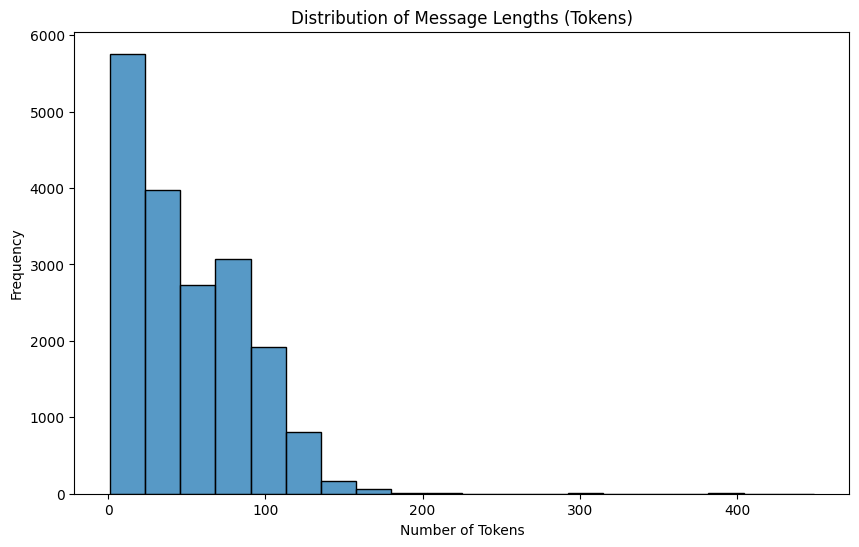

In [7]:
message_lengths = df['Message'].dropna().apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(message_lengths, bins=20)
plt.title('Distribution of Message Lengths (Tokens)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.savefig('../results/message_length_distribution.png')
plt.show()


## 7. Conclusion and Next Steps
- **Findings**: Whitespace tokenization is simple but may split multi-word entities incorrectly. XLM-RoBERTa handles Amharic better but requires label alignment.
- **Challenges**: Multi-word entities (e.g., "Addis Abeba") need consistent `B-` and `I-` labeling.
- **Next Steps**: Implement `label_data.py` to label 50 messages, using whitespace tokenization for simplicity, and save to `data/processed/labeled_data.conll`.
